In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt

import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

In [4]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


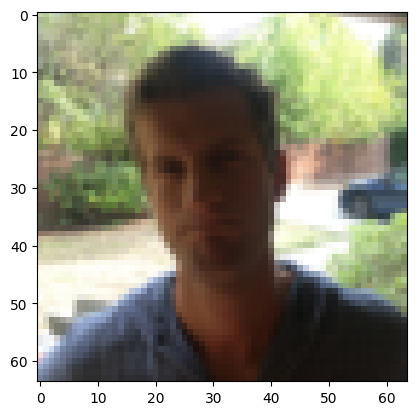

In [5]:
index = 10
plt.imshow(X_train[index]) #display sample training image
plt.show()

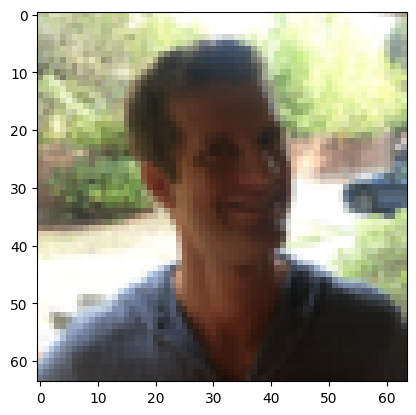

In [6]:
index = 10
plt.imshow(X_test[index])
plt.show()

In [7]:
from tensorflow.keras.models import Sequential

In [66]:
def happy_model():
  model = Sequential([
            tfl.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),
            tfl.Conv2D(32, (7,7)),
            tfl.BatchNormalization(axis=-1),
            tfl.ReLU(),
            tfl.MaxPool2D(),
            tfl.Conv2D(32, (3,3)),
            tfl.ReLU(),
            tfl.MaxPool2D(),
            tfl.Flatten(),
            tfl.Dense(1, activation='sigmoid')
            # YOUR CODE STARTS HEREe
        ])
  return model

In [67]:
happy_model = happy_model()


In [68]:
happy_model.compile(optimizer='adam',loss='binary_crossentropy', metrics= ["accuracy"])

In [69]:
happy_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_6 (ZeroPaddi  (None, 70, 70, 3)        0         
 ng2D)                                                           
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_6 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 re_lu_9 (ReLU)              (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                      

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
stop = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=0,
    start_from_epoch=0
)

In [70]:
history = happy_model.fit(X_train,Y_train, epochs=50, validation_split=0.2,verbose=1, batch_size = 16, callbacks=stop)

Epoch 1/50
30/30 [==============================] - 2s 15ms/step - loss: 0.5294 - accuracy: 0.7563 - val_loss: 0.6329 - val_accuracy: 0.5583
Epoch 2/50
30/30 [==============================] - 0s 9ms/step - loss: 0.2979 - accuracy: 0.8917 - val_loss: 0.5667 - val_accuracy: 0.7167
Epoch 3/50
30/30 [==============================] - 0s 9ms/step - loss: 0.2093 - accuracy: 0.9208 - val_loss: 0.5284 - val_accuracy: 0.7000
Epoch 4/50
30/30 [==============================] - 0s 9ms/step - loss: 0.1493 - accuracy: 0.9563 - val_loss: 0.3930 - val_accuracy: 0.8583
Epoch 5/50
30/30 [==============================] - 0s 8ms/step - loss: 0.1137 - accuracy: 0.9708 - val_loss: 0.3304 - val_accuracy: 0.9750
Epoch 6/50
30/30 [==============================] - 0s 8ms/step - loss: 0.0867 - accuracy: 0.9750 - val_loss: 0.2961 - val_accuracy: 0.9667
Epoch 7/50
30/30 [==============================] - 0s 9ms/step - loss: 0.0928 - accuracy: 0.9708 - val_loss: 0.2296 - val_accuracy: 0.9833
Epoch 8/50
30/30 [=

In [71]:
happy_model.evaluate(X_test,Y_test)

5/5 [==============================] - 0s 17ms/step - loss: 0.1052 - accuracy: 0.9667


[0.10515181720256805, 0.9666666388511658]

In [72]:
pred = happy_model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [73]:
pred = np.where(pred>0.5,1,0)

In [74]:
Acc = accuracy_score(Y_test,pred)

In [75]:
print('Accuracy_score: ',Acc)

Accuracy_score:  0.9666666666666667


In [76]:
matrix = confusion_matrix(Y_test,pred)
print('Confusion matrix:','\n', matrix)

Confusion matrix: 
 [[61  5]
 [ 0 84]]


### Sign detection using Functional API


In [77]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

In [78]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.


In [79]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [80]:
onehot_encoder = OneHotEncoder(sparse=False)

In [90]:
train = Y_train_orig.T
Y_train = onehot_encoder.fit_transform(train)
test = Y_test_orig.T
Y_test = onehot_encoder.fit_transform(test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [91]:
print(Y_train)

[[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [92]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [98]:
def functional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    Z0 = tfl.ZeroPadding2D(padding=(3, 3))(input_img)
    Z1 = tfl.Conv2D(8, (4,4), activation='linear', padding="same", strides=1)(Z0)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)
    Z2 = tfl.Conv2D(16, 2, activation='linear', padding="same", strides=1)(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4, 4), strides=(4, 4), padding='same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(6, activation='softmax')(F)
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [99]:
model = functional_model((64, 64, 3))
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [96]:
stop = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    start_from_epoch=0
)

In [100]:
history = model.fit(X_train,Y_train, epochs=500, validation_split =0.2, batch_size=64, callbacks=stop)

Epoch 1/500
14/14 [==============================] - 2s 31ms/step - loss: 1.8078 - accuracy: 0.1782 - val_loss: 1.7877 - val_accuracy: 0.2037
Epoch 2/500
14/14 [==============================] - 0s 12ms/step - loss: 1.7845 - accuracy: 0.2326 - val_loss: 1.7855 - val_accuracy: 0.1898
Epoch 3/500
14/14 [==============================] - 0s 17ms/step - loss: 1.7773 - accuracy: 0.2176 - val_loss: 1.7771 - val_accuracy: 0.1852
Epoch 4/500
14/14 [==============================] - 0s 13ms/step - loss: 1.7704 - accuracy: 0.2431 - val_loss: 1.7740 - val_accuracy: 0.1944
Epoch 5/500
14/14 [==============================] - 0s 14ms/step - loss: 1.7625 - accuracy: 0.2766 - val_loss: 1.7656 - val_accuracy: 0.2917
Epoch 6/500
14/14 [==============================] - 0s 12ms/step - loss: 1.7538 - accuracy: 0.2859 - val_loss: 1.7501 - val_accuracy: 0.3472
Epoch 7/500
14/14 [==============================] - 0s 12ms/step - loss: 1.7416 - accuracy: 0.3160 - val_loss: 1.7447 - val_accuracy: 0.2870
Epoch 

In [101]:
loss,Accuracy = model.evaluate(X_test,Y_test)
print("loss:", loss)
print("Accuracy:",Accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.3118 - accuracy: 0.8833
loss: 0.311826229095459
Accuracy: 0.8833333253860474


<ipython-input-102-44ad4541d415>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
<ipython-input-102-44ad4541d415>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

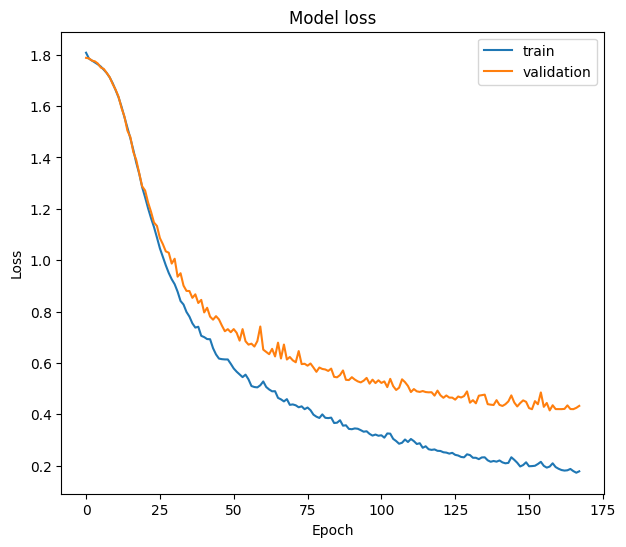

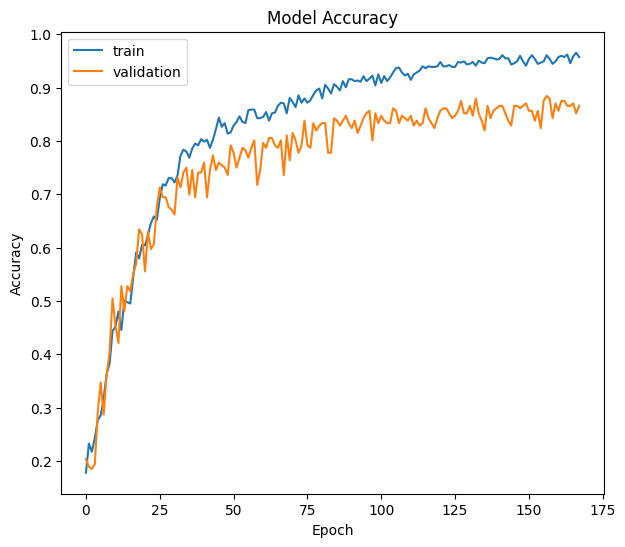

In [102]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(7,6)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(7,6)).set(xlabel='Epoch',ylabel='Accuracy')